# Seaborn与Matplotlib

下面用Matplotlib的经典图形样式和配色方案画一个简易的随机游走图（random-walk）。

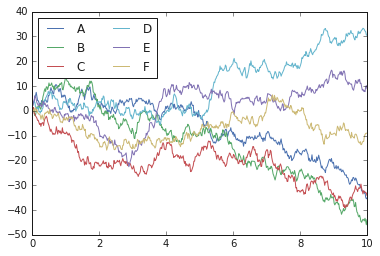

In [33]:
# 导入matplotlib工具
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

# 创建一些随机游走数据
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

# 用Matplotlib默认样式画图
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn.jpg")

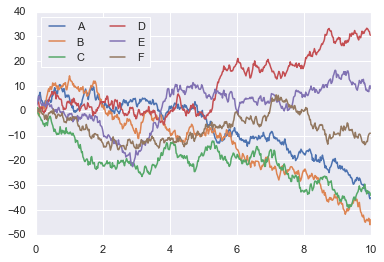

In [34]:
# 将Seaborn导入简记为sns
import seaborn as sns
sns.set()

# 同样的画图代码,用seaborn画图
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left');
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn1.jpg")

# Seaborn图形介绍
## 频次直方图、KDE和密度图

### 频次直方图可视化特性

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


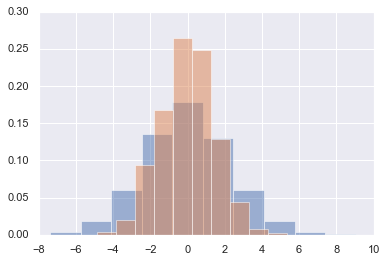

In [35]:
# 频次直方图可视化特性
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size = 2000)
data = pd.DataFrame(data, columns = ['x', 'y'])

for col in 'xy':
    plt.hist(data[col], normed = True, alpha = 0.5)
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn2.jpg")

### KDE可视化分布特性

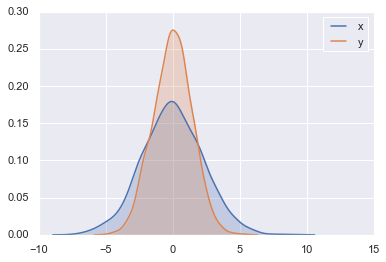

In [36]:
# KDE可视化分布特性
for col in 'xy':
    sns.kdeplot(data[col], shade = True)
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn3.jpg")

### 频次直方图与KDE的结合

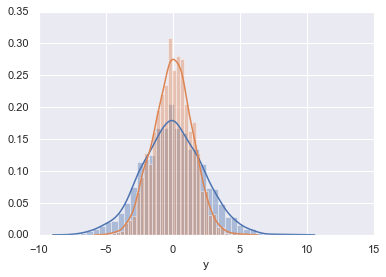

In [37]:
# 频次直方图与KDE的结合
# 用distplot可以让频次直方图与KDE结合起来
sns.distplot(data['x'])
sns.distplot(data['y']);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn4.jpg")

### 二维KDE图

D:\Anaconda3\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


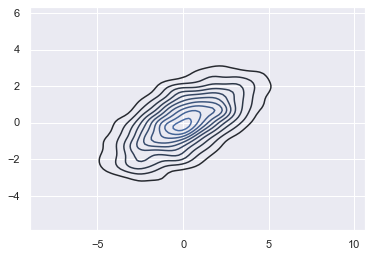

In [38]:
# 二维KDE图
sns.kdeplot(data);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn5.jpg")

### 二维KDE的联合分布图 
用sns.jointplot可以同时看到两个变量的联合分布与单变量的独立分布

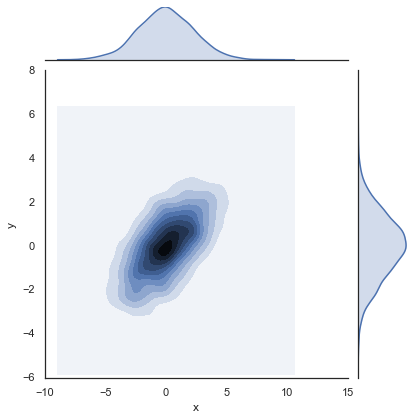

In [39]:
# 二维KDE的联合分布图
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind = 'kde');
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn6.jpg")

### 用六边形块画的联合分布图

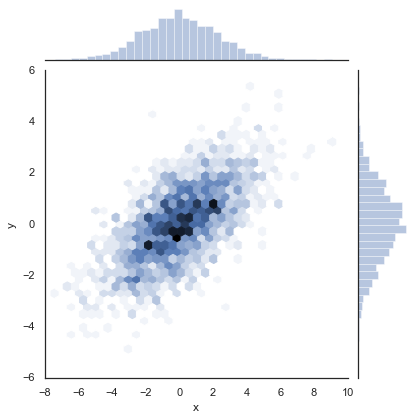

In [40]:
# 用六边形画的联合分布图
# 用六边形块替代频次直方图
with sns.axes_style('white'):
    sns.jointplot('x', 'y', data, kind = 'hex')

plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn6.jpg")

## 矩阵图
- 当你需要对多维数据进行可视化时，最终都要使用矩阵图。
- 如果想画出所有变量中任意两个变量之间的图形，用矩阵图探索多维数据间的相关性非常有效。

In [41]:
# 下面用鸢尾花数据集来演示，其中有三种鸢尾花的花瓣与花萼数据
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


D:\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


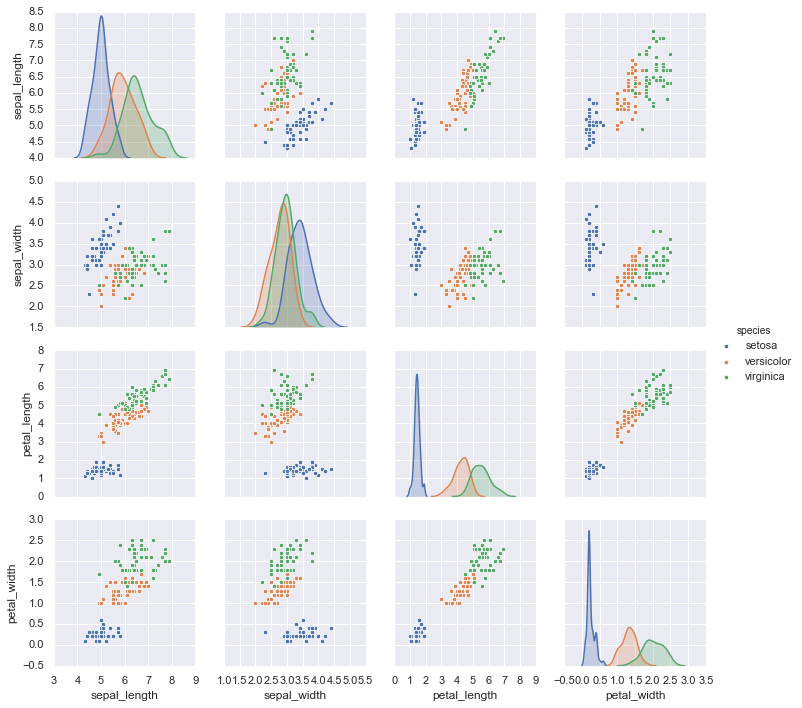

In [42]:
# 四个变量的矩阵图
# 可视化样本中多个维度的关系非常简单，直接用sns.pairplot即可
sns.pairplot(iris, hue = 'species', size = 2.5);
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn7.jpg")

## 分面频次直方图
Seaborn的FacetGrid函数让某个餐厅统计的服务员收取小费的数据变得简单

In [43]:
# 分面频次直方图
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


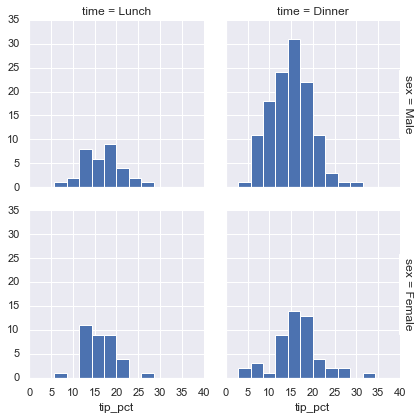

In [44]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row = 'sex', col = 'time', margin_titles = True)
grid.map(plt.hist, 'tip_pct', bins = np.linspace(0, 40, 15));
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn8.jpg")

## 因子图（factor plot）
因子图也是对数据子集进行可视化的方法。

D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


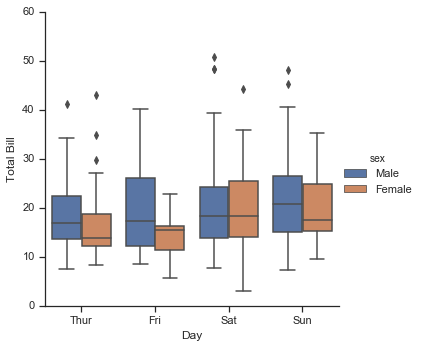

In [45]:
# 因子图中不同离散因子的分布对比
with sns.axes_style(style = 'ticks'):
    g = sns.factorplot('day', 'total_bill', 'sex', data = tips, kind = 'box')
    g.set_axis_labels('Day', 'Total Bill')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn9.jpg")

## 联合分布
可以用sns.jointplot画出不同数据集的联合分布和各数据本身的分布

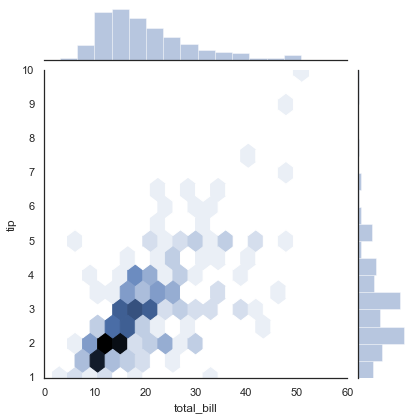

In [46]:
# 联合分布图
with sns.axes_style('white'):
    sns.jointplot('total_bill', 'tip', data = tips, kind = 'hex')
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn10.jpg")

联合分布图也可以自动进行KDE和回归

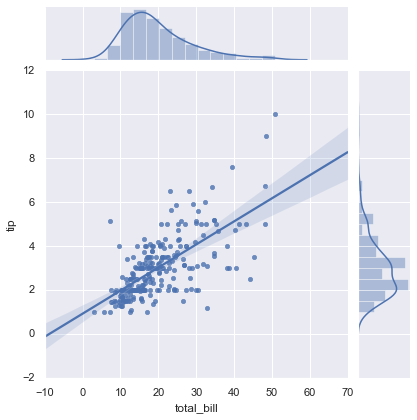

In [47]:
# 带回归拟合的联合分布
sns.jointplot("total_bill", 'tip', data = tips, kind = 'reg');
plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seabong11.jpg")

## 条形图
时间序列数据可以用sns.factorplot画出条形图。

In [48]:
# 频次直方图是因子图的特殊形式
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


D:\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


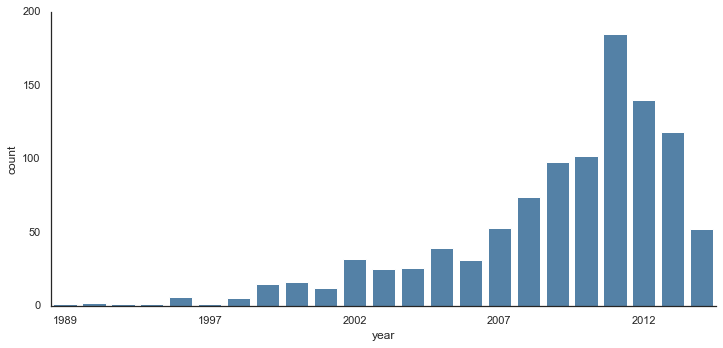

In [49]:
# 频次直方图是因子图的特殊形式
with sns.axes_style('white'):
    g = sns.factorplot('year', data = planets, aspect = 2, kind = 'count', color = 'steelblue')
    g.set_xticklabels(step = 5)
    
# with sns.axes_style('white'):
#     g = sns.factorplot('year', data = planets, aspect = 4.0, kind = 'count', hue = 'method', order = range(2001, 2015))
#     g.set_ylabels('Number of Planets Discovered')

plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn12.jpg")

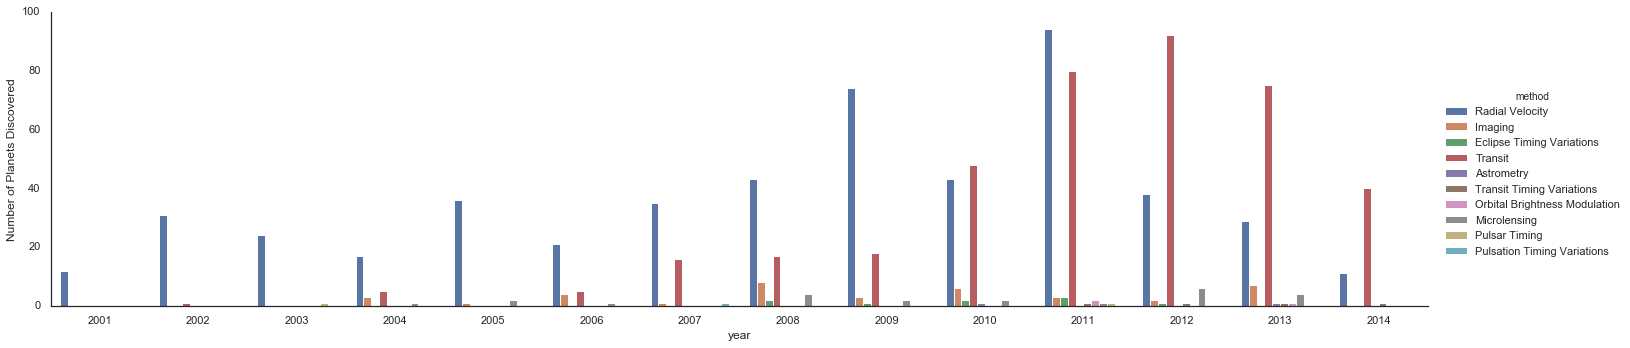

In [50]:
# 不同年份、方法发现行星的数量
# 我们可以对比用不同的方法（method参数）发现行星的数量
with sns.axes_style('white'):
    g = sns.factorplot('year', data = planets, aspect = 4.0, kind = 'count', 
                       hue = 'method', order = range(2001, 2015))
    
    g.set_ylabels('Number of Planets Discovered')

plt.savefig(r"D:\Python-Excel\Data-analysis\Python-Data-Science\Matplotlib-实现各种数据可视化\seaborn-images\seaborn13.jpg")